In [37]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [38]:
import pandas as pd
import kraken as pla
import matplotlib.pyplot as plt
import numpy as np
import scanpy as sc

In [39]:
filenames = ['/home/sebastian/data/placenta_rebuttal/156KS_files/156KS_Decoded_ImmunePanel.csv',
'/home/sebastian/data/placenta_rebuttal/156KS_files/156KS_Decoded_KISS and CGA.csv',
'/home/sebastian/data/placenta_rebuttal/156KS_files/156KS_Decoded_PlacentaPanel.csv']

coord_tables=[]

for file_coordinates in filenames:
    coord_tables.append(pd.read_csv(file_coordinates))
    

coordinates=pd.concat(coord_tables)

coordinates.gene.replace('HBA1/2','HBA1', inplace=True)
coordinates.gene.replace('KISS','KISS1', inplace=True)

coordinates.index = np.arange(coordinates.shape[0])
coordinates

,gene,X,Y
0,CD1C,1008.575758,142.939394
1,ZEB3,1025.466667,149.222222
2,FCGR2A,21.893939,160.757576
3,STMN1,613.714286,168.714286
4,TGFB1,176.041667,177.416667
...,...,...,...
268005,DIAPH3,12702.965517,14810.793103
268006,HBA1,12758.000000,14812.000000
268007,DIAPH3,12702.848485,14816.484848
268008,PAPPA2,12529.500000,14837.500000


In [40]:
adata = sc.read_h5ad('/home/sebastian/data/Placenta_normalized_Seurat_markers.h5ad')
bg = pla.PixelMap(np.load('bg.npy').T,upscale=0.2)


In [41]:

sdata = pla.SpatialData(coordinates.gene, 
                       coordinates.X, 
                       coordinates.Y,
                       pixel_maps=[bg],
                       scanpy=adata,synchronize=True)



In [42]:
sqdata = sq.datasets.merfish()

  0%|          | 0.00/49.2M [00:00<?, ?B/s]

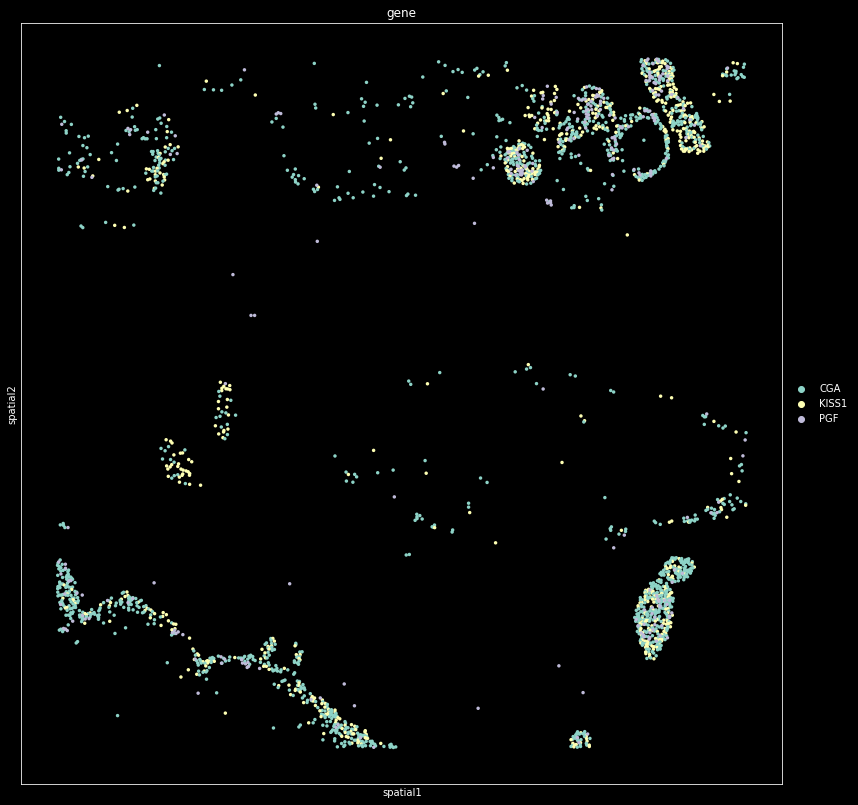

In [94]:
plt.figure(figsize=(14,14))
ax=plt.subplot(111)

sqdata_ = sdata[sdata.g.isin(('KISS1','PGF','CGA'))].spatial[3000:5000,3000:5000].squidpy()
sqdata_.obs['gene']=sqdata_.obs['gene'].cat.remove_unused_categories()

sc.pl.spatial(sqdata_, spot_size=10, color='gene',ax=ax, )

In [88]:
sqdata_.obs['gene']

54700       CGA
54714       CGA
54746       CGA
54748     KISS1
54755       CGA
          ...  
190071      PGF
190088      PGF
190120      PGF
190122      PGF
190125      PGF
Name: gene, Length: 2393, dtype: category
Categories (3, object): ['CGA', 'KISS1', 'PGF']